# Luria-Delbrück  estimator and error models (Sections 3.1 - 3.4)

This notebook is a Python implementation of the simulations described from section 3.1 to section 3.4 of the thesis.

It has been used _anytree_ library, from GitHub, to build the tree data structure that represent a generational tree.

Repository: https://github.com/c0fec0de/anytree

Documentation: https://anytree.readthedocs.io/

In [1]:
# import
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import binom
from anytree import Node, RenderTree

# Check that used machine supports int64
# max int64 ~ 9*10^18
if(np.random.randint(0, high = 9223372036854775808)):
    print("Ok, this machine supports int64!")

Ok, this machine supports int64!


## Implementation of the Luria-Delbrück stochastic experiment 
Import from *LD.py*.

In [2]:
from LD import LD

## Run a verbose test

In [3]:
#fix seed 9 to have the first tree extinct
np.random.seed(9)

#run until reach minimum desired size (32)
simulation = LD(death_prob=0.3, min_size=32, quiet=False)
simulation.print_tree()



Generating new tree...


Empty layer! Tree is extinct.
0
└── 1
    └── 2


Generating new tree...


Mutation attempts: 13700000000
Mutations number: 46
Rand_int: 12816135677, imax: 137, randint/imax: 93548435.59854014
Mutant cell ID: 82, Mutants in progeny: 2, Extant: 45, Frequency: 0.044444444444444446
Rand_int: 5622205906, imax: 137, randint/imax: 41037999.31386861
Mutant cell ID: 43, Mutants in progeny: 3, Extant: 45, Frequency: 0.06666666666666667
Rand_int: 3017956354, imax: 137, randint/imax: 22028878.496350367
Mutant cell ID: 68, Mutants in progeny: 1, Extant: 45, Frequency: 0.022222222222222223
Rand_int: 13013848947, imax: 137, randint/imax: 94991598.15328467
Mutant cell ID: 21, Mutants in progeny: 4, Extant: 45, Frequency: 0.08888888888888889
Rand_int: 1941209802, imax: 137, randint/imax: 14169414.613138687
Mutant cell ID: 84, Mutants in progeny: 2, Extant: 45, Frequency: 0.044444444444444446
Rand_int: 8018987249, imax: 137, randint/imax: 58532753.642335765
Mutant cell ID: 88

## Estimate the role of the number of bases 
Section 3.4.1, figure 4.

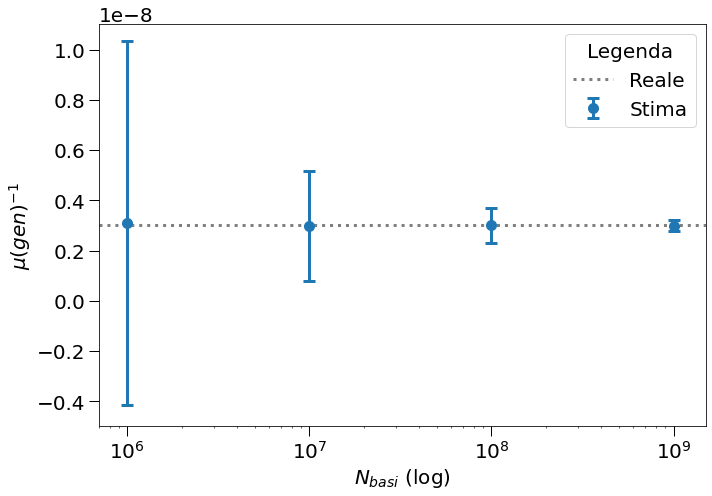

Bases number
[1000000.0, 10000000.0, 100000000.0, 1000000000.0]

mean estimated mu
[3.0967761129564775e-09, 2.979032682153314e-09, 3.005484166248066e-09, 2.9903873754576203e-09]

standard deviation
[7.2335839894771726e-09, 2.194729208306602e-09, 7.033821105291645e-10, 2.1658645075332698e-10]


In [4]:
# Estimate rate variyng bases number
# Repeat simulations N times to get mean estimated mut rate and devSt
N = 1000

# variable parameter
bases_nums =[1E+6, 10E+6, 100E+6, 1000E+6]

# results lists
# mean value
est_mu = list([])
# standard deviation
est_mu_std = list([])


# set seed to have reproducible results
np.random.seed(0)

# simulate
for bases_num in bases_nums:
    # sigle runs results
    mu = np.array([])
    # perform N single runs
    for _ in np.arange(N):
        tree = LD(bases = bases_num, death_prob = 0., min_size = 32)
        # save single run results
        mu = np.append(mu, tree._mu_est)
        
    # save results from N runs
    est_mu.append(np.mean(mu))
    est_mu_std.append(np.std(mu))

# plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

#plt.title("Ruolo del numero di basi\n"+str(N)+" simulazioni ogni punto")
ax.set_xlabel(r'$N_{basi}$ (log)', fontsize=20)
ax.set_ylabel(r'$\mu (gen)^{-1}$', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

### set x y range
ax.set_xlim(7*10**5, 1.5*10**9)
ax.set_ylim(-0.5*10**(-8), 1.1*10**-8)

## set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)

ax.errorbar(bases_nums, est_mu, yerr=est_mu_std,
         marker ='o', c='tab:blue', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stima')

ax.axhline(y=tree._mu, label='Reale', c='tab:gray',lw=3, ls=':')

ax.set_xscale('log')
ax.legend(fontsize=20, title='Legenda',title_fontsize=20)

plt.tight_layout()

#plt.savefig('bases_number.pdf')

plt.show()

# print results
print("Bases number")
print(bases_nums)
print("\nmean estimated mu")
print(est_mu)
print("\nstandard deviation")
print(est_mu_std)

## Estimate the role of the death probability
Section 3.4.2, figure 5.

Use the estimator, from equation 4 in section 3.2.4, corrected by the number of cells with alive progeny as an information known inside the numerical simulation. 

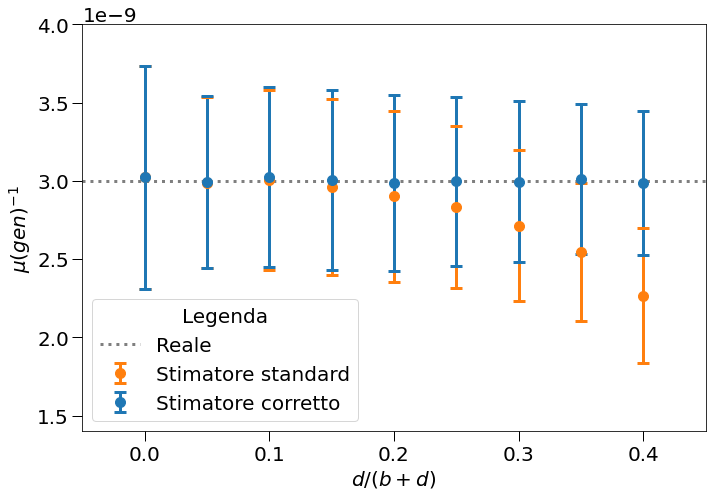

death probabilities
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]

estimated mu
[3.0220970729279304e-09, 2.9879767981794967e-09, 3.007087184501031e-09, 2.9619119037772193e-09, 2.901792567378014e-09, 2.8337513246593344e-09, 2.7145964405001787e-09, 2.5468105287798005e-09, 2.267614816719241e-09]

estimated mu std
[7.112123893767068e-10, 5.475615408377806e-10, 5.742703045083371e-10, 5.645611230838203e-10, 5.474421579316555e-10, 5.152738739173353e-10, 4.842651514477391e-10, 4.406847004298228e-10, 4.3315197025089265e-10]

estimated mu no-dead
[3.0220970729279304e-09, 2.9924520076335215e-09, 3.026076493609938e-09, 3.0072162709839276e-09, 2.9872831756835827e-09, 2.996572033830023e-09, 2.995407074926959e-09, 3.0127034794931624e-09, 2.9840547333215975e-09]

estimated mu no-dead std
[7.112123893767068e-10, 5.480784493340143e-10, 5.769964279233544e-10, 5.752095385749278e-10, 5.599738229346211e-10, 5.375305439718773e-10, 5.133341534518483e-10, 4.812667067852426e-10, 4.607153438021519e-10]


In [5]:
# Estimate rate variyng bases number
# Repeat simulations N times to get mean estimated mut rate and devSt
N = 1000 # number of simulation for each death probability
# N = 1000, time ~ 15 s
# N = 10^4, time ~ 150 s

# variable parameter
death_probabilities = np.linspace(0., 0.4, 9)

# results lists
# mean values
est_mu = list([])
est_mu_no_dead = list([])
# standard deviations
est_mu_std = list([])
est_mu_no_dead_std = list([])

# set seed to have reproducible results
np.random.seed(0)

# simulate
for death_prob in death_probabilities:
    # sigle runs results
    mu = np.array([])
    mu_no_dead = np.array([])
    
    # perform N single runs
    for _ in np.arange(N):
        tree = LD(bases = 1E+8, death_prob = death_prob, min_size = 32)
        tree.test_LD_estimator_no_dead()
        #save single run results
        mu = np.append(mu, tree._mu_est)
        mu_no_dead = np.append(mu_no_dead, tree._mu_est_no_dead)
    
    # save results from N runs
    est_mu.append(np.mean(mu))
    est_mu_std.append(np.std(mu))
    
    est_mu_no_dead.append(np.mean(mu_no_dead))
    est_mu_no_dead_std.append(np.std(mu_no_dead))
    
# plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

### set x y range
ax.set_xlim(-0.05, .45)
ax.set_ylim(0.0000000014, 0.000000004)

## set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)

ax.set_xlabel(r'$d/(b+d)$', fontsize=20)
ax.set_ylabel(r'$\mu (gen)^{-1}$', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

ax.errorbar(death_probabilities, est_mu, yerr=est_mu_std, marker ='o',c='tab:orange', capsize=6, capthick=3,fmt=' ',lw=3, label='Stimatore standard',markersize=10)

ax.errorbar(death_probabilities, est_mu_no_dead, yerr=est_mu_no_dead_std, marker ='o', c='tab:blue', capsize=6, capthick=3,lw=3,fmt=' ',label='Stimatore corretto',markersize=10)

ax.axhline(y=tree._mu, label='Reale', c='tab:gray',lw=3, ls=':')
ax.legend(fontsize=20, title='Legenda',title_fontsize=20,loc='lower left')

plt.tight_layout()

#plt.savefig('dead_cells_correction.pdf')
plt.show()     

# print results
print("death probabilities")
print(death_probabilities)
print("\nestimated mu")
print(est_mu)
print("\nestimated mu std")
print(est_mu_std)
print("\nestimated mu no-dead")
print(est_mu_no_dead)
print("\nestimated mu no-dead std")
print(est_mu_no_dead_std)

## Estimate the role of the number of generations prior to cloning, $N_0$
Section 3.4.3, figure 6.

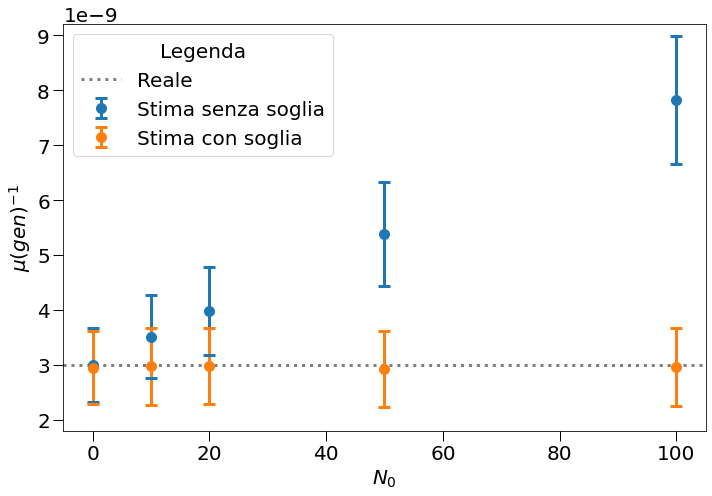

N0gen
[0, 10, 20, 50, 100]

mean estimated mu
[3.0014519060764386e-09, 3.5170971750719628e-09, 3.986452125443329e-09, 5.380323505921865e-09, 7.81935677585473e-09]

standard deviation
[6.714042767980749e-10, 7.513493533947734e-10, 8.015554028262433e-10, 9.477485705233884e-10, 1.1605020921013645e-09]

mean estimated mu threshold
[2.9556454458312186e-09, 2.9758067413835872e-09, 2.980806741763493e-09, 2.9220970535655645e-09, 2.9595164159526515e-09]

mu threshold standard deviation
[6.674259297335023e-10, 7.031131030905519e-10, 6.909110767776108e-10, 6.900760366173709e-10, 7.064664574581414e-10]


In [6]:
# Estimate rate variyng N0_gen
# Repeat simulations N times to get mean estimated mut rate and devSt
N = 1000

# variable parameter
N0_nums = [0, 10, 20, 50, 100]

# results lists
# mean value
est_mu = list([])
# standard deviation
est_mu_std = list([])

est_mu_threshold = ([])
est_mu_threshold_std = []
# set seed to have reproducible results
np.random.seed(0)

# simulate
for N0gen in N0_nums:
    # sigle runs results
    mu = np.array([])
    mu_threshold = []
    # perform N single runs
    for _ in np.arange(N):
        tree = LD(bases = 1E+8, death_prob = 0., min_size = 32)
        tree.test_LD_estimator_N0gen(N0gen = N0gen)
        # save single run results
        mu = np.append(mu, tree._mu_est_N0gen)
        mu_threshold = np.append(mu_threshold, tree._mu_est_N0gen_threshold)
    # save results from N runs
    est_mu.append(np.mean(mu))
    est_mu_std.append(np.std(mu))
    est_mu_threshold.append(np.mean(mu_threshold))
    est_mu_threshold_std.append(np.std(mu_threshold))
    


# plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

#plt.title(r'Ruolo del numero di generazioni $N_0$'+str("\n")+str(N)+" simulazioni ogni punto")
ax.set_xlabel(r'$N_0$', fontsize=20)
ax.set_ylabel(r'$\mu (gen)^{-1}$', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

### set x y range
ax.set_xlim(-5, 105)
ax.set_ylim(1.8*10**-9, 9.2*10**-9)

## set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)

ax.errorbar(N0_nums, est_mu, yerr=est_mu_std,
         marker ='o', c='tab:blue', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stima senza soglia')

ax.errorbar(N0_nums, est_mu_threshold, yerr=est_mu_threshold_std,
         marker ='o', c='tab:orange', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stima con soglia')

ax.axhline(y=tree._mu,  label='Reale', c='tab:gray',lw=3, ls=':')
ax.legend(fontsize=20, title='Legenda',title_fontsize=20)

plt.tight_layout()
#plt.savefig('N0_gen.pdf')
plt.show() 

# print results
print("N0gen")
print(N0_nums)
print("\nmean estimated mu")
print(est_mu)
print("\nstandard deviation")
print(est_mu_std)
print("\nmean estimated mu threshold")
print(est_mu_threshold)
print("\nmu threshold standard deviation")
print(est_mu_threshold_std)

## Estimate the role of sequencing errors

Section 3.4.4 figure 7.

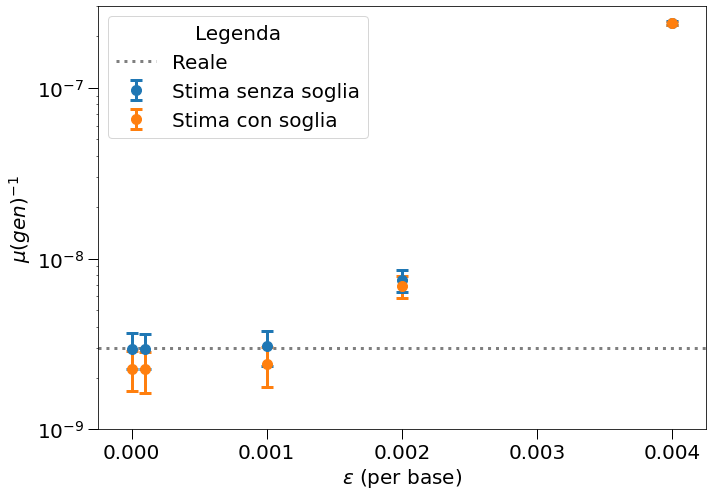

Seq. errors
[0.0, 0.0001, 0.001, 0.002, 0.004]

mean estimated mu
[2.9540325432826143e-09, 2.9419357665408604e-09, 3.060000306401949e-09, 7.465163055554122e-09, 2.388322533344286e-07]

standard deviation
[6.907630098741781e-10, 6.82629859660592e-10, 7.225594715867396e-10, 1.1020672551416704e-09, 6.237203991457796e-09]

mean estimated mu threshold
[2.269355009519816e-09, 2.242580812384988e-09, 2.40145180374211e-09, 6.898711185981244e-09, 2.3841111809495748e-07]

mu threshold standard deviation
[6.00318682562452e-10, 6.043285604119427e-10, 6.250636509003318e-10, 1.0349517716995404e-09, 6.297072456438934e-09]


In [7]:
# Estimate rate variyng the sequencing error
# Repeat simulations N times to get mean estimated mut rate and devSt
N=1000

# variable parameter
seq_errors = [0., 0.0001, 0.001, 0.002, 0.004]

# results lists
# mean value
est_mu = list([])
est_mu_threshold = []
# standard deviation
est_mu_std = list([])
est_mu_threshold_std = []

# set seed to have reproducible results
np.random.seed(0)

# simulate
for seq_err in seq_errors:
    # sigle runs results
    mu = np.array([])
    mu_threshold = np.array([])
    # perform N single runs
    for _ in np.arange(N):
        tree = LD(bases = 1E+8, death_prob = 0., min_size = 32, cov=128)
        #tree.test_LD_estimator_N0gen(N0gen = 100)
        tree.test_LD_estimator_seq_err(seq_err = seq_err, threshold = 1./32)
        # save single run results
        mu = np.append(mu, tree._mu_est_seq_err)
        mu_threshold= np.append(mu_threshold, tree._mu_est_seq_err_threshold)
        
    # save results from N runs
    est_mu.append(np.mean(mu))
    est_mu_std.append(np.std(mu))
    est_mu_threshold.append(np.mean(mu_threshold))
    est_mu_threshold_std.append(np.std(mu_threshold))

# plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

plt.setp(ax,xticks=[0., 0.001, 0.002, 0.003, 0.004])

#plt.title("Ruolo dell'errore di sequenziamento\n"+str(N)+" runs")
ax.set_xlabel(r'$\epsilon$ (per base)', fontsize=20)
ax.set_ylabel(r'$\mu (gen)^{-1}$', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

### set x y range
ax.set_xlim(-0.00025, 0.00425)
ax.set_ylim(10**-9, 3*10**-7)

## set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)

ax.errorbar(seq_errors, est_mu, yerr=est_mu_std,
         marker ='o', c='tab:blue', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stima senza soglia')

ax.errorbar(seq_errors, est_mu_threshold, yerr=est_mu_threshold_std,
         marker ='o', c='tab:orange', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10, 
         label='Stima con soglia')

ax.axhline(y=tree._mu,  label='Reale', c='tab:gray',lw=3, ls=':')
ax.legend(fontsize=20, title='Legenda',title_fontsize=20)
ax.set_yscale('log')
plt.tight_layout()

#plt.savefig('seq_err.pdf')
plt.show() 

# print results
print("Seq. errors")
print(seq_errors)
print("\nmean estimated mu")
print(est_mu)
print("\nstandard deviation")
print(est_mu_std)
print("\nmean estimated mu threshold")
print(est_mu_threshold)
print("\nmu threshold standard deviation")
print(est_mu_threshold_std)

### Estimate the role of the ploidy
Section 3.4.5, figure 8.

Extant = 32, coverage = 128, threshold = 1/32


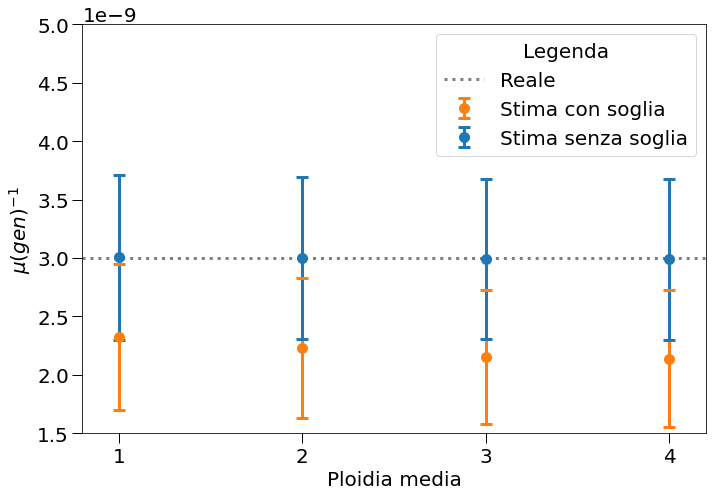


mean estimated mu
[2.958371254102361e-09, 2.9817099677534694e-09, 2.985500290919385e-09, 2.9880486784611493e-09]

standard deviation
[6.982513360922016e-10, 6.908994313093511e-10, 6.881958667794052e-10, 6.877389106170653e-10]


In [8]:
# Estimate rate variyng the mean ploidy
# Repeat simulations N times to get mean estimated mut rate and devSt
N=1000

# variable parameter
mean_ploidy_set = [1, 2, 3, 4]

# results lists
# mean value
est_mu = list([])
est_mu_with_correction = []
# standard deviation
est_mu_std = list([])
est_mu_with_correction_std = []

# set seed to have reproducible results
np.random.seed(0)

# simulate
for mean_ploidy in mean_ploidy_set:
    # sigle runs results
    mu = np.array([])
    mu_with_correction = np.array([])
    
    # perform N single runs
    for _ in range(N):
        tree = LD(bases = 1E+8, death_prob = 0., min_size = 32, cov=128)
        tree.test_LD_estimator_ploidy(mean_ploidy = mean_ploidy, threshold = 1./32)
        # save single run results
        mu = np.append(mu, tree._mu_est_ploidy)
        mu_with_correction= np.append(mu_with_correction, tree._mu_est_ploidy_with_correction)
    
    # save results from N runs
    est_mu.append(np.mean(mu))
    est_mu_std.append(np.std(mu))
    est_mu_with_correction.append(np.mean(mu_with_correction))
    est_mu_with_correction_std.append(np.std(mu_with_correction))
    
    
# plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

#plt.title("Ruolo della ploidia\n"+str(N)+" simulazioni con soglia 1/32")
ax.set_xlabel('Ploidia media', fontsize=20)
ax.set_ylabel(r'$\mu (gen)^{-1}$', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

plt.setp(ax,xticks=[1,2,3,4])

### set x y range
ax.set_xlim(0.8, 4.2)
ax.set_ylim(1.5*10**-9, 5*10**-9)

## set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)

ax.errorbar(mean_ploidy_set, est_mu_with_correction, yerr=est_mu_with_correction_std,
         marker ='o', c='tab:orange', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stima con soglia')



#----------------------------
# ESTIMATE WITHOUT THRESHOLD
#----------------------------

# Estimate rate variyng the mean ploidy
# Repeat simulations N times to get mean estimated mut rate and devSt
N=10000

# variable parameter
mean_ploidy_set = [1, 2, 3, 4]

# results lists
# mean value
est_mu = list([])
est_mu_with_correction = []
# standard deviation
est_mu_std = list([])
est_mu_with_correction_std = []

# set seed to have reproducible results
np.random.seed(0)

# simulate
for mean_ploidy in mean_ploidy_set:
    # sigle runs results
    mu = np.array([])
    mu_with_correction = np.array([])
    
    # perform N single runs
    for _ in range(N):
        tree = LD(bases = 1E+8, death_prob = 0., min_size = 32, cov=128)
        tree.test_LD_estimator_ploidy(mean_ploidy = mean_ploidy, threshold = 0.)
        # save single run results
        mu = np.append(mu, tree._mu_est_ploidy)
        mu_with_correction= np.append(mu_with_correction, tree._mu_est_ploidy_with_correction)
    
    # save results from N runs
    est_mu.append(np.mean(mu))
    est_mu_std.append(np.std(mu))
    est_mu_with_correction.append(np.mean(mu_with_correction))
    est_mu_with_correction_std.append(np.std(mu_with_correction))
    
ax.errorbar(mean_ploidy_set, est_mu_with_correction, yerr=est_mu_with_correction_std,
         marker ='o', c='tab:blue', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
         label='Stima senza soglia')
    

ax.axhline(y=tree._mu,  label='Reale', c='tab:gray',lw=3, ls=':')
ax.legend(fontsize=20, title='Legenda',title_fontsize=20)
plt.tight_layout()

#plt.savefig('ploidy.pdf')
print("Extant = 32, coverage = 128, threshold = 1/32")
plt.show() 

print("\nmean estimated mu")
print(est_mu)
print("\nstandard deviation")
print(est_mu_std)

### Estimate including all error models
Section 3.4.6, figure 9.

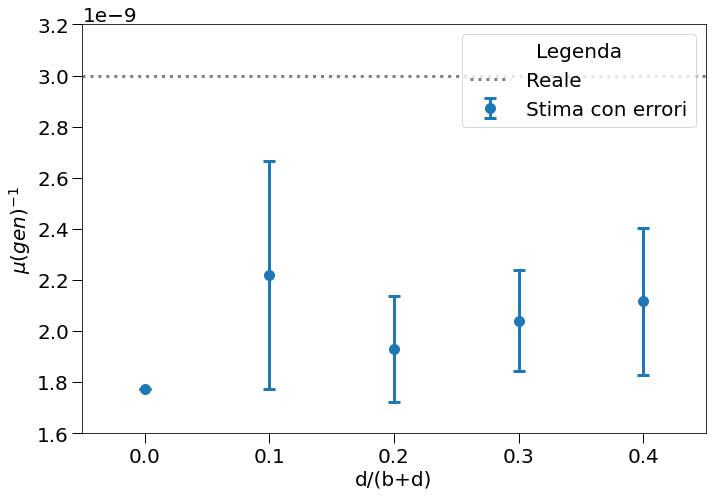


mean estimated mu
[1.774193645929233e-09, 2.220430289669642e-09, 1.929831952196776e-09, 2.040815548353996e-09, 2.115930208813621e-09]

standard deviation
[6.982513360922016e-10, 6.908994313093511e-10, 6.881958667794052e-10, 6.877389106170653e-10]


In [9]:
#Number of simulations
N = 10000

# fixed parameters
seq_err = 0.001
mean_ploidy = 3
N0_gen = 50
min_size = 32
threshold = 1./32

cov = 128

#variable parameter
death_probs = [0., 0.1, 0.2, 0.3, 0.4]

#results
mu = []
mu_std = []

np.random.seed(0)

for death_prob in death_probs:
    this_prob_results = []
    #perform N single runs
    for _ in range(N):
        tree = LD(bases = 1E+8, death_prob = death_prob, min_size = min_size, cov=cov)
        tree.test_LD_estimator_all_errors(N0gen = N0_gen, seq_err = seq_err, 
                                          mean_ploidy = mean_ploidy, threshold = threshold)
        # save single run results
        this_prob_results = np.append(mu, tree._mu_est_all_errors)
    
    mu.append(np.mean(this_prob_results))
    mu_std.append(np.std(this_prob_results))
    
    
# plot results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#plt.title("Ruolo della ploidia\n"+str(N)+" simulazioni con soglia 1/32")
ax.set_xlabel('d/(b+d)', fontsize=20)
ax.set_ylabel(r'$\mu (gen)^{-1}$', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)

### set x y range
ax.set_xlim(-0.05, 0.45)
ax.set_ylim(1.6*10**-9, 3.2*10**-9)

## set ticks
ax.tick_params(which='major', width=1.0, labelsize=20)
ax.tick_params(which='major', length=10, labelsize=20)


ax.errorbar(death_probs, mu, yerr=mu_std,
            marker ='o', capsize=6, capthick=3, lw=3,fmt=' ',markersize=10,
            label='Stima con errori')

ax.axhline(y=tree._mu,  label='Reale', c='tab:gray', lw=3, ls=':')
    
ax.legend(fontsize=20, title='Legenda',title_fontsize=20)
plt.tight_layout()

#plt.savefig('all_errors_models.pdf')
plt.show()

print("\nmean estimated mu")
print(mu)
print("\nstandard deviation")
print(est_mu_std)